In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings ('ignore')

## Loading Dataset

In [3]:
for dirPath, dirName, fileNames in os.walk("Emotion Dataset"):
    print (dirPath)
    print (dirName)
    print (fileNames)
    print("")

Emotion Dataset
['OAF_angry', 'OAF_disgust', 'OAF_Fear', 'OAF_happy', 'OAF_neutral', 'OAF_Pleasant_surprise', 'OAF_Sad', 'TESS Toronto emotional speech set data', 'YAF_angry', 'YAF_disgust', 'YAF_fear', 'YAF_happy', 'YAF_neutral', 'YAF_pleasant_surprised', 'YAF_sad']
[]

Emotion Dataset\OAF_angry
[]
['OAF_back_angry.wav', 'OAF_bar_angry.wav', 'OAF_base_angry.wav', 'OAF_bath_angry.wav', 'OAF_bean_angry.wav', 'OAF_beg_angry.wav', 'OAF_bite_angry.wav', 'OAF_boat_angry.wav', 'OAF_bone_angry.wav', 'OAF_book_angry.wav', 'OAF_bought_angry.wav', 'OAF_burn_angry.wav', 'OAF_cab_angry.wav', 'OAF_calm_angry.wav', 'OAF_came_angry.wav', 'OAF_cause_angry.wav', 'OAF_chain_angry.wav', 'OAF_chair_angry.wav', 'OAF_chalk_angry.wav', 'OAF_chat_angry.wav', 'OAF_check_angry.wav', 'OAF_cheek_angry.wav', 'OAF_chief_angry.wav', 'OAF_choice_angry.wav', 'OAF_cool_angry.wav', 'OAF_dab_angry.wav', 'OAF_date_angry.wav', 'OAF_dead_angry.wav', 'OAF_death_angry.wav', 'OAF_deep_angry.wav', 'OAF_dime_angry.wav', 'OAF_dip

In [4]:
paths = []
labels = []
for dirPath, dirName, fileNames in os.walk("Emotion Dataset"):
    for fileName in fileNames:
        path = os.path.join(dirPath, fileName)
        paths.append (path)
        #print(os.path.join(dirPath, fileName))
        #print(fileName)
        label = fileName.split('_')[-1]
        label = label.split ('.')[0]
        labels.append(label)
        #print (label)
        #print ()

In [5]:
paths

['Emotion Dataset\\OAF_angry\\OAF_back_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_bar_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_base_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_bath_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_bean_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_beg_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_bite_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_boat_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_bone_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_book_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_bought_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_burn_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_cab_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_calm_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_came_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_cause_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_chain_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_chair_angry.wav',
 'Emotion Dataset\\OAF_angry\\OAF_chalk_angry.wav',
 'Emotion Dataset\\OAF_angry

In [6]:
labels

['angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',
 'angry',


In [7]:
print (len(paths), len(labels))

5600 5600


In [8]:
print (paths[1234], labels[1234])

Emotion Dataset\OAF_Sad\OAF_dog_sad.wav sad


In [9]:
df = pd.DataFrame ()
df['speach'] = paths
df['label'] = labels

df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

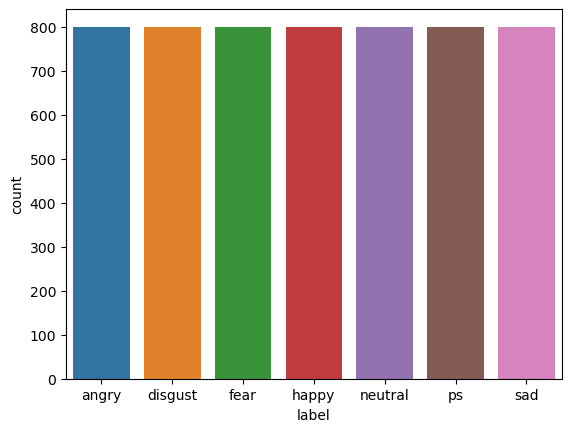

In [10]:
sns.countplot (x='label', data=df)

All the data are equal. if the are not equal, then we would be data data balancing to get equal data for all label.

## Functions

In [11]:
def waveplot (data, sr, emotion):
    plt.figure (figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.waveshow (data, sr=sr)
    plt.show()

def spectogram (data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure (figsize=(10, 4))
    plt.title (emotion, size=20)
    librosa.display.specshow (xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()



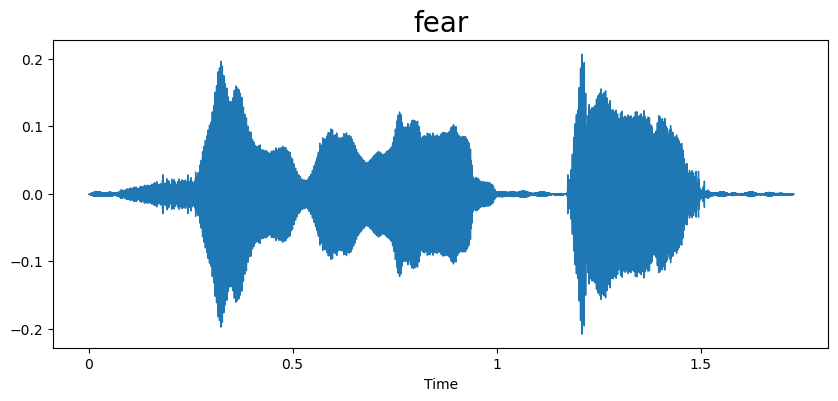

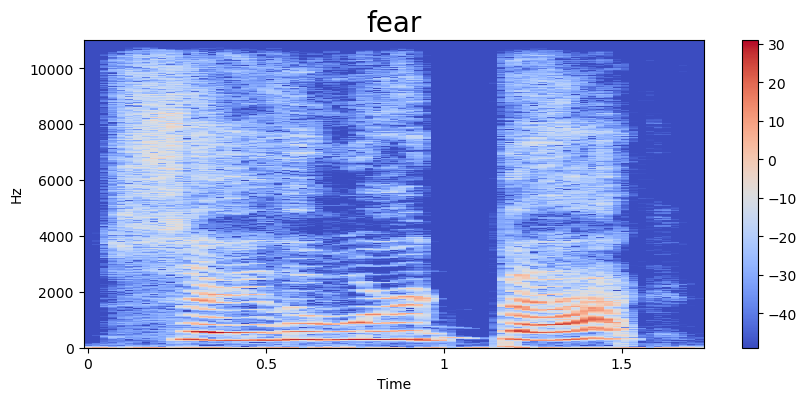

In [12]:
emotion = 'fear'
path = df['speach'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load (path)
waveplot (data, sampling_rate, emotion)
spectogram (data, sampling_rate, emotion)

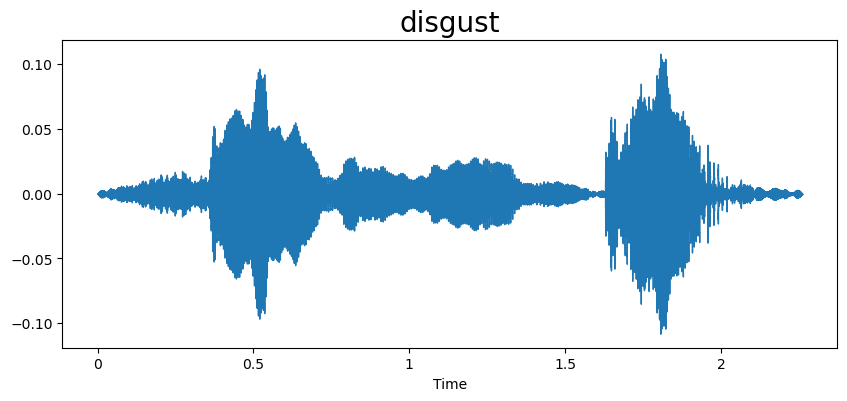

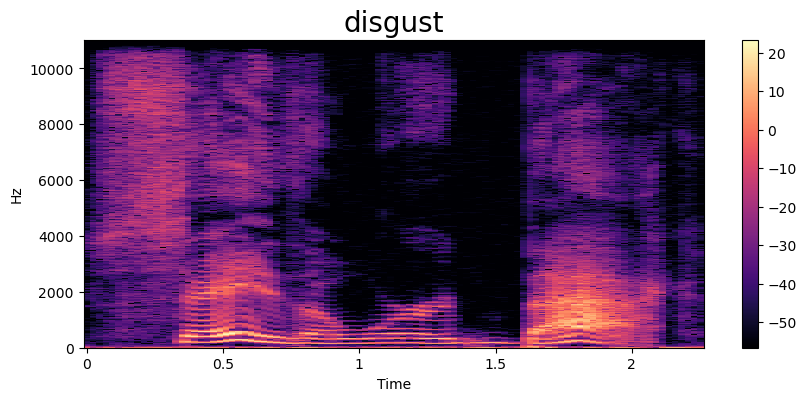

In [13]:
emotion = 'disgust'
path = df['speach'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load (path)
waveplot (data, sampling_rate, emotion)
spectogram (data, sampling_rate, emotion)

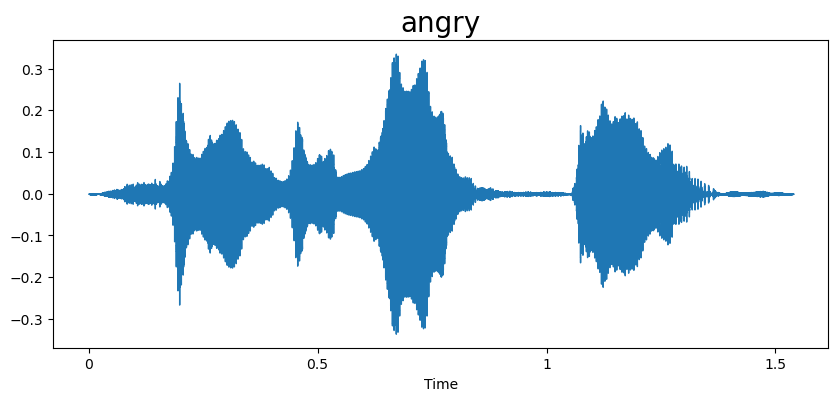

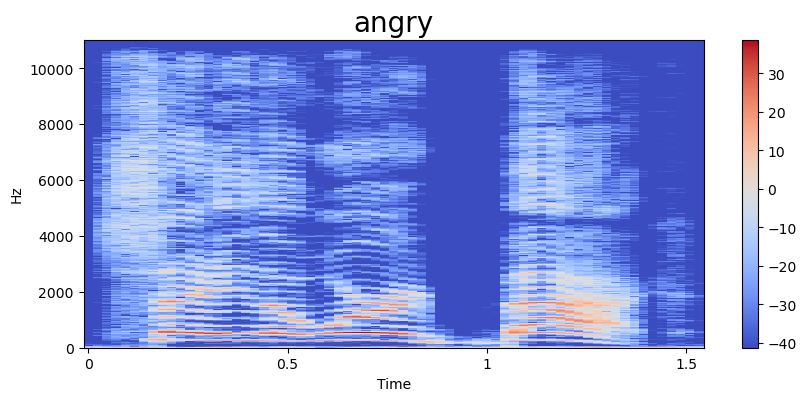

In [14]:
emotion = 'angry'
path = df['speach'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load (path)
waveplot (data, sampling_rate, emotion)
spectogram (data, sampling_rate, emotion)

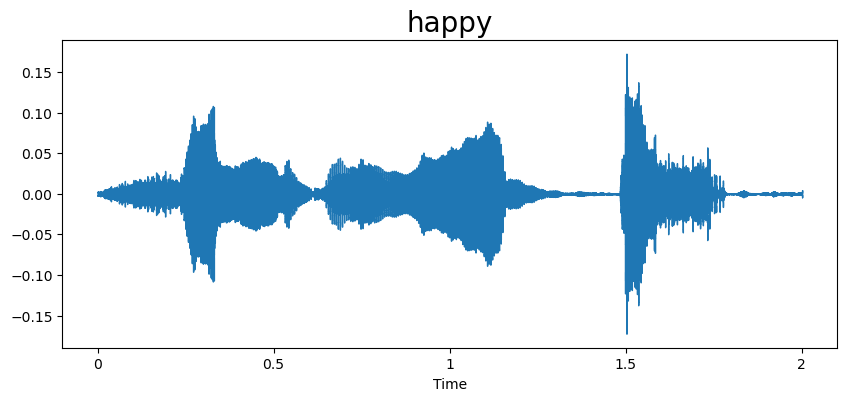

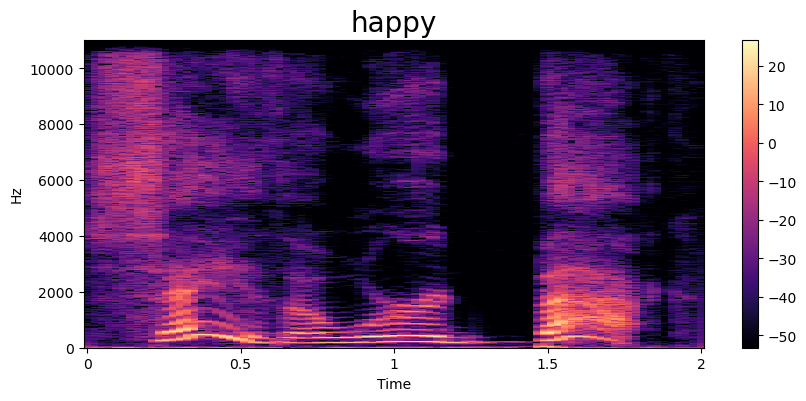

In [15]:
emotion = 'happy'
path = df['speach'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load (path)
waveplot (data, sampling_rate, emotion)
spectogram (data, sampling_rate, emotion)

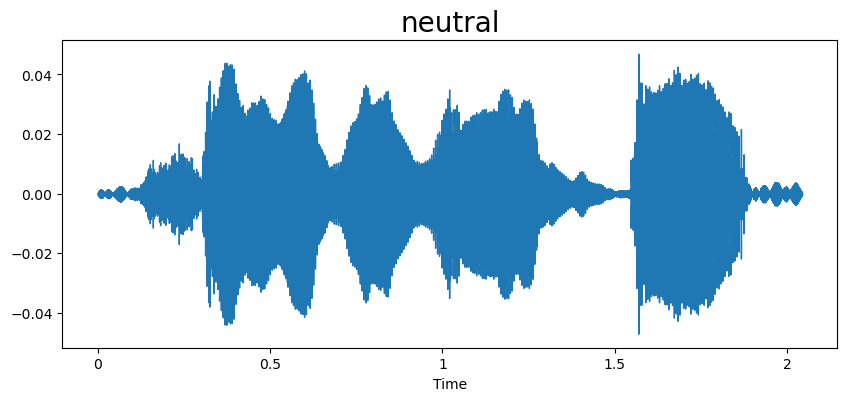

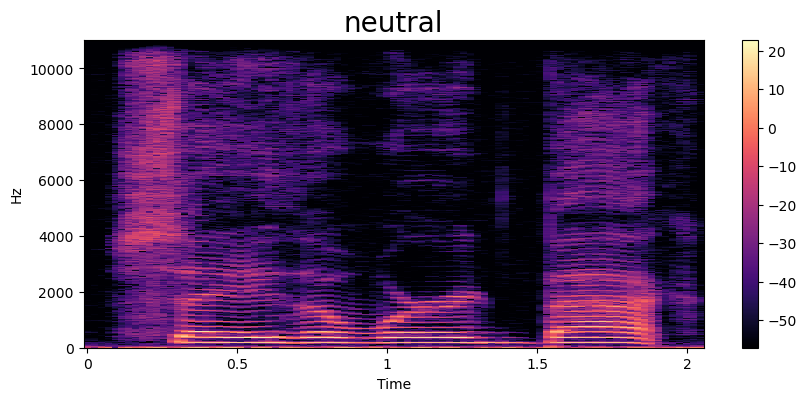

In [16]:
emotion = 'neutral'
path = df['speach'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load (path)
waveplot (data, sampling_rate, emotion)
spectogram (data, sampling_rate, emotion)

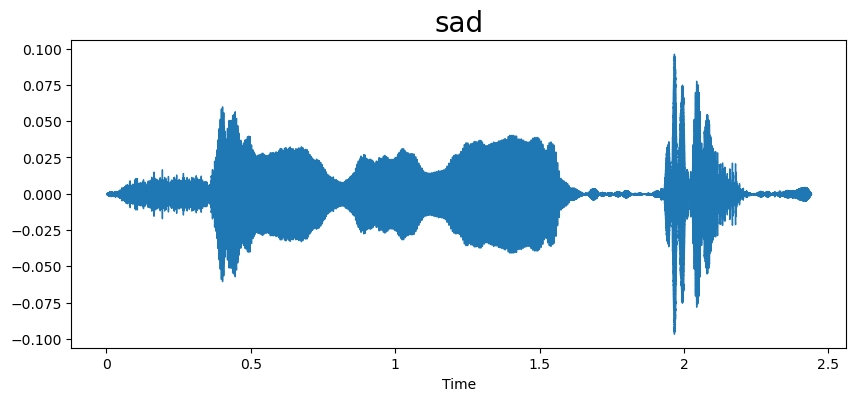

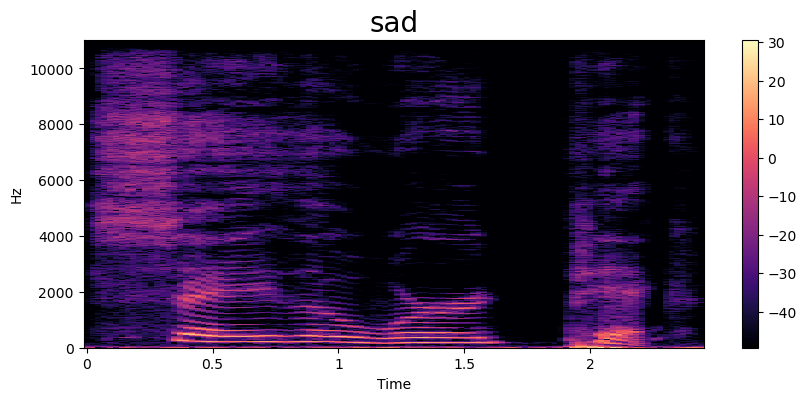

In [17]:
emotion = 'sad'
path = df['speach'][df['label']==emotion].iloc[123]
data, sampling_rate = librosa.load (path, duration=3)
waveplot (data, sampling_rate, emotion)
spectogram (data, sampling_rate, emotion)
Audio (path)

## Feature Extraction

In [18]:
def extract_mfcc (fileName):
    y, sr = librosa.load(fileName, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc



In [19]:
extract_mfcc(df['speach'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127563e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736607e-01, -1.8325534e+00,  2.0210150e-01,
        7.2755075e-01,  1.3177377e+00,  2.8863375e+00,  2.8557906e+00,
       -4.7129216e+00, -4.4365106e+00, -1.6211592e+00, -1.0239840e+01,
       -7.5512619e+00, -1.7968805e+00, -7.0376525e+00,  9.4365845e+00,
        8.3558540e+00,  2.1712360e+01,  1.9216991e+01,  2.0348928e+01,
        1.3413366e+01,  8.3391724e+00,  3.9472210e-01,  5.1113148e+00,
        9.5687389e+00,  5.4548678e+00,  2.5099635e+00, -1.8239075e+00,
        4.8689623e+00,  9.3139238e+00,  2.0891500e+00, -1.9064913e+00],
      dtype=float32)

In [20]:
X_mfcc = df['speach'].apply(lambda x: extract_mfcc(x))

In [21]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560086, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.21709463, 2...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.048096, ...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.906364, 28.373262, 39.577065, -...
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speach, Length: 5600, dtype: object

In [22]:
X_mfcc.shape
#type(X_mfcc)


(5600,)

In [23]:
type(X_mfcc)

pandas.core.series.Series

In [26]:
X = [x for x in X_mfcc]
X = np.array(X)

type(X)
X.shape

(5600, 40)

In [32]:
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [67]:
from sklearn.preprocessing import OneHotEncoder
encc = OneHotEncoder()
ye = encc.fit_transform(df[['label']])
#y = y.toarray()
print(ye)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  :	:
  (5575, 6)	1.0
  (5576, 6)	1.0
  (5577, 6)	1.0
  (5578, 6)	1.0
  (5579, 6)	1.0
  (5580, 6)	1.0
  (5581, 6)	1.0
  (5582, 6)	1.0
  (5583, 6)	1.0
  (5584, 6)	1.0
  (5585, 6)	1.0
  (5586, 6)	1.0
  (5587, 6)	1.0
  (5588, 6)	1.0
  (5589, 6)	1.0
  (5590, 6)	1.0
  (5591, 6)	1.0
  (5592, 6)	1.0
  (5593, 6)	1.0
  (5594, 6)	1.0
  (5595, 6)	1.0
  (5596, 6)	1.0
  (5597, 6)	1.0
  (5598, 6)	1.0
  (5599, 6)	1.0


In [29]:
y.shape

(5600, 7)

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential ([
        LSTM(128, return_sequences=False, input_shape=(40, 1)),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(7, activation='softmax')
    ])


model.compile (loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,127 (301.28 KB)

 Trainable params: 77,127 (301.28 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit (x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=512, shuffle=True)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.1988 - loss: 1.9325 - val_accuracy: 0.3732 - val_loss: 1.7768
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.3606 - loss: 1.7280 - val_accuracy: 0.6045 - val_loss: 1.4188
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.4866 - loss: 1.3926 - val_accuracy: 0.6812 - val_loss: 1.0345
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 229ms/step - accuracy: 0.5878 - loss: 1.0861 - val_accuracy: 0.7473 - val_loss: 0.7351
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - accuracy: 0.6833 - loss: 0.8492 - val_accuracy: 0.8313 - val_loss: 0.5193
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 225ms/step - accuracy: 0.7807 - loss: 0.6252 - val_accuracy: 0.8804 - val_loss: 0.3759
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step - accuracy: 0.8361 - loss: 0.4810 - val_accuracy: 0.9286 - val_loss: 0.2487
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.8788 - loss: 0.3801 - val_accuracy: 0.9402 - val_loss:

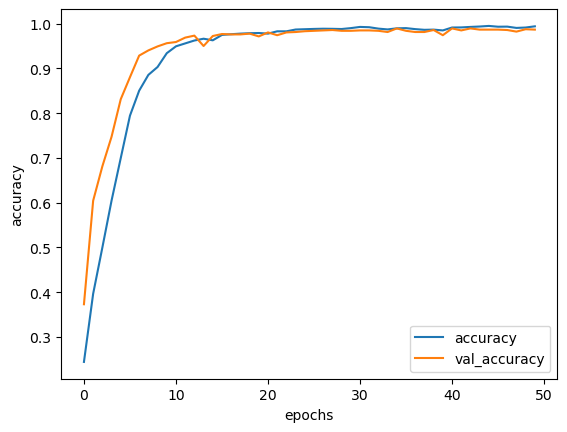

In [56]:
epochs = list(range(50))

acc = history.history ['accuracy']
val_acc = history.history ['val_accuracy']
loss = history.history ['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, acc, label='accuracy')
plt.plot (epochs, val_acc, label='val_accuracy')
plt.xlabel ('epochs')
plt.ylabel ('accuracy')
plt.legend()
plt.show()


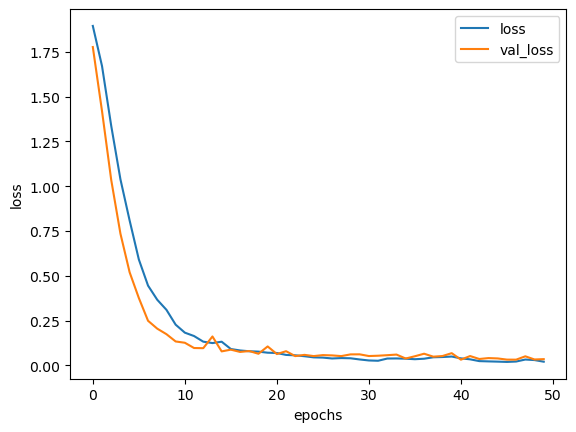

In [57]:
plt.plot (epochs, loss, label='loss')
plt.plot (epochs, val_loss, label='val_loss')
plt.xlabel ('epochs')
plt.ylabel ('loss')
plt.legend()
plt.show()

In [58]:
loss, accuracy = model.evaluate (x_test, y_test, verbose=1)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9873 - loss: 0.0309


In [59]:
accuracy

0.9866071343421936

In [60]:
loss

0.034504856914281845

In [61]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)

y_pred

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


array([[3.7988382e-08, 4.2087656e-08, 9.9999964e-01, ..., 7.8072784e-09,
        3.9395756e-10, 3.0491282e-07],
       [9.9999607e-01, 3.2645002e-07, 2.2719084e-06, ..., 5.9949053e-07,
        4.3418808e-07, 7.4520791e-08],
       [2.4246689e-05, 3.7735072e-04, 1.8528106e-05, ..., 5.6134763e-06,
        5.8903523e-02, 7.0094457e-04],
       ...,
       [9.9996650e-01, 5.2911437e-06, 1.5620415e-05, ..., 3.7409959e-06,
        3.4319387e-06, 2.2870581e-06],
       [2.8152479e-05, 5.9208924e-05, 2.6996122e-06, ..., 1.1779648e-06,
        5.4935725e-07, 9.9989665e-01],
       [1.8237566e-07, 7.7371842e-06, 9.6671087e-08, ..., 8.3963670e-08,
        3.8721524e-08, 9.9999177e-01]], dtype=float32)

In [62]:
y_predd = [np.argmax(y_pred[x]) for x in range (0, len(y_pred))]
print(y_predd)
y_test

[2, 0, 3, 5, 1, 6, 1, 2, 2, 6, 1, 6, 6, 4, 5, 0, 2, 0, 5, 4, 5, 1, 2, 5, 2, 6, 0, 4, 2, 5, 0, 2, 4, 6, 5, 6, 3, 4, 4, 4, 2, 1, 6, 1, 1, 4, 0, 0, 6, 3, 0, 6, 0, 1, 4, 4, 6, 4, 1, 6, 6, 3, 0, 6, 6, 0, 1, 2, 2, 4, 0, 3, 1, 0, 3, 1, 1, 3, 5, 6, 2, 6, 4, 1, 0, 6, 3, 4, 0, 2, 0, 5, 5, 5, 1, 4, 5, 1, 1, 3, 5, 4, 4, 6, 2, 2, 1, 2, 4, 3, 4, 4, 1, 6, 6, 6, 1, 4, 1, 2, 6, 0, 4, 5, 6, 0, 0, 4, 3, 3, 4, 1, 3, 4, 5, 0, 1, 5, 4, 5, 1, 5, 5, 2, 3, 3, 6, 5, 6, 6, 2, 6, 2, 3, 2, 4, 1, 1, 5, 6, 3, 0, 4, 1, 2, 1, 6, 1, 1, 3, 5, 3, 4, 2, 0, 2, 3, 6, 0, 5, 0, 4, 5, 4, 0, 1, 4, 2, 1, 2, 3, 6, 4, 2, 6, 4, 3, 4, 0, 6, 4, 1, 1, 4, 0, 1, 5, 2, 6, 6, 5, 6, 0, 0, 5, 6, 0, 2, 0, 0, 3, 4, 1, 6, 6, 4, 4, 5, 5, 0, 3, 6, 3, 2, 4, 3, 5, 2, 4, 2, 0, 4, 4, 6, 4, 3, 0, 2, 1, 1, 0, 6, 3, 6, 5, 2, 3, 6, 6, 4, 5, 5, 6, 5, 6, 4, 4, 6, 1, 2, 3, 6, 5, 1, 0, 6, 3, 3, 2, 3, 5, 3, 5, 2, 2, 0, 4, 2, 3, 6, 6, 0, 1, 4, 3, 0, 2, 3, 3, 6, 1, 4, 2, 2, 1, 0, 4, 1, 2, 2, 1, 0, 4, 4, 4, 6, 3, 6, 6, 5, 0, 5, 2, 5, 6, 6, 5, 6, 0, 2, 5, 5, 5, 

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [63]:
y_testt = [np.argmax(x) for x in y_test]
print(y_testt)

[2, 0, 3, 5, 1, 6, 1, 2, 2, 6, 1, 6, 6, 4, 5, 0, 2, 0, 5, 4, 5, 1, 2, 5, 2, 6, 0, 4, 2, 5, 0, 2, 4, 6, 5, 6, 3, 4, 4, 4, 2, 1, 6, 1, 1, 4, 0, 0, 6, 3, 0, 6, 0, 1, 4, 4, 6, 4, 1, 6, 6, 3, 0, 6, 6, 0, 1, 2, 2, 4, 0, 3, 1, 0, 3, 1, 1, 3, 5, 6, 2, 6, 4, 1, 0, 6, 3, 4, 0, 2, 0, 5, 5, 5, 1, 4, 5, 1, 1, 3, 5, 4, 4, 6, 2, 2, 1, 2, 4, 3, 4, 4, 1, 6, 6, 6, 1, 4, 1, 2, 6, 0, 4, 5, 6, 0, 0, 4, 3, 3, 4, 1, 3, 4, 5, 0, 1, 5, 4, 5, 1, 5, 5, 2, 3, 3, 6, 5, 6, 6, 2, 1, 2, 3, 2, 4, 1, 1, 5, 6, 3, 0, 4, 1, 2, 1, 6, 1, 1, 3, 5, 3, 4, 2, 0, 2, 3, 6, 0, 5, 0, 4, 5, 4, 0, 1, 4, 2, 1, 2, 5, 6, 4, 2, 6, 4, 3, 4, 0, 6, 4, 1, 1, 4, 0, 1, 5, 2, 6, 6, 5, 6, 0, 0, 5, 6, 0, 2, 0, 0, 3, 4, 1, 6, 6, 4, 4, 5, 5, 0, 3, 6, 3, 2, 4, 3, 5, 2, 4, 2, 3, 4, 4, 6, 4, 3, 0, 2, 1, 1, 0, 6, 3, 6, 5, 2, 3, 6, 6, 4, 5, 5, 6, 5, 6, 4, 4, 6, 1, 2, 3, 6, 5, 1, 0, 6, 3, 5, 2, 3, 1, 3, 5, 2, 2, 0, 4, 2, 3, 6, 6, 0, 1, 4, 3, 0, 2, 3, 3, 6, 1, 4, 2, 2, 1, 0, 4, 1, 2, 2, 1, 0, 4, 4, 4, 6, 3, 6, 6, 5, 0, 5, 2, 5, 6, 6, 5, 1, 0, 2, 5, 5, 5, 

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix (y_testt, y_predd)

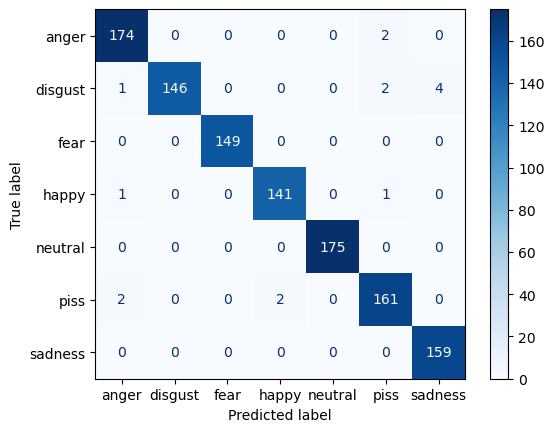

In [68]:
class_names = ['anger', 'disgust', 'fear', 'happy', 'neutral', 'piss', 'sadness']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Preprocess for detection

In [69]:
dd = extract_mfcc('Emotion Dataset\\OAF_disgust\\OAF_keen_disgust.wav')
dd.shape

(40,)

In [70]:
dd = np.expand_dims(dd, axis=0)
dd

array([[-5.0981305e+02,  8.5816742e+01,  3.8638054e+01,  2.1159494e+01,
         1.1364037e+01,  5.5999632e+00, -3.5570292e+00,  4.9563775e+00,
        -1.9757349e+01, -8.5262384e+00, -8.7385883e+00, -3.5432451e+00,
        -2.8324459e+00, -8.3124666e+00, -2.1368384e+00,  2.6420724e+00,
        -3.9512873e+00,  1.3432150e+00, -3.0159490e+00, -1.4416742e+00,
        -1.4129964e+00, -3.6433070e+00, -1.1815807e+00, -1.2865843e+00,
         1.4366347e+00,  1.0412750e+01,  5.5103314e-01,  6.3556275e+00,
        -2.6313481e+00,  4.1761482e-01,  1.2003091e-03, -8.9477092e-01,
         3.2576668e-01,  3.8433814e+00,  1.5298569e+00,  5.6007466e+00,
         5.0022717e+00,  9.0353765e+00,  1.0814996e+01,  1.3508361e+01]],
      dtype=float32)

In [71]:
dd.shape

(1, 40)

In [72]:
#dd = np.array(dd)
dd = np.expand_dims(dd, -1)
dd.shape

(1, 40, 1)

In [73]:
pred = model.predict(dd)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step


In [74]:
pred

array([[3.9648917e-04, 8.9559531e-01, 2.2993605e-04, 2.2940939e-02,
        3.6345326e-04, 4.5186812e-03, 7.5955145e-02]], dtype=float32)

In [75]:
np.max(pred)

0.8955953

In [76]:
np.argmax(pred)

1

In [ ]:
max_value = np.max(prediction)
max_index = np.argmax(prediction)

In [77]:
model.save('Audio_Emotion.h5')